___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 12
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  1.2391472
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0010047
   
   Prediction time/pt. (sec) :  0.0000100
   


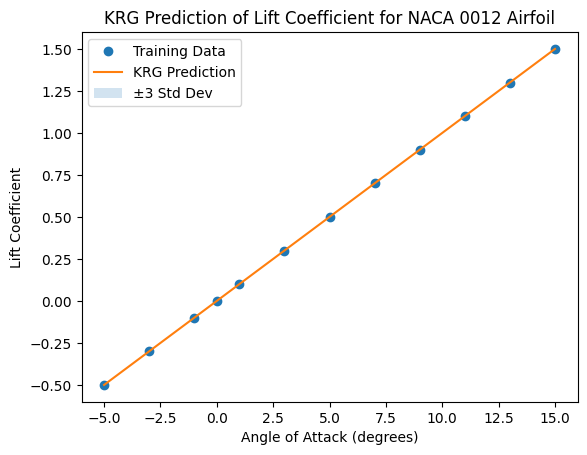

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG
from juliacall import Main as jl
import pandas as pd


In [ ]:
alpha = list(range(-5, 16, 2))  # range of angle of attacks, in degrees
re = 1e5
# Example data for NACA 0012 airfoil
# alpha_values = np.array([-5, -3, -1, 0, 1, 3, 5, 7, 9, 11, 13, 15])  # Angle of attack in degrees
# c_l_values = np.array([-0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])  # Lift coefficient

# Convert Python list to Julia array
list_of_files = ["naca0012.dat"]
julia_list_of_files = jl.convert(jl.Array, list_of_files)
julia_alpha = jl.convert(jl.Array, [float(a) for a in alpha])

# Call the function
combined_data = jl.process_files(julia_list_of_files, julia_alpha, re)

# Convert the combined data to a DataFrame with explicit column names
columns = ["alpha", "c_l", "c_d", "c_dp", "c_m", "converged", "camber", "thickness"]
data = pd.DataFrame(combined_data, columns=columns)
print(data.head())
# Create the surrogate model
xt = data["alpha"].values.reshape(-1, 1)
yt = data["c_l"].values.reshape(-1, 1)

print(yt)

model = KRG()
model.set_training_values(xt, yt)
model.train()

# Create grid for prediction
alpha_grid = np.linspace(min(xt), max(xt), 100).reshape(-1, 1)
c_l_pred = model.predict_values(alpha_grid).flatten()
c_l_var = model.predict_variances(alpha_grid).flatten()
c_l_std = np.sqrt(c_l_var)

# Plot the results
plt.figure()
plt.plot(xt, yt, 'o', label='Training Data')
plt.plot(alpha_grid, c_l_pred, '-', label='KRG Prediction')
plt.fill_between(alpha_grid.flatten(), c_l_pred - 3 * c_l_std, c_l_pred + 3 * c_l_std, alpha=0.2, label='±3 Std Dev')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient')
plt.title('KRG Prediction of Lift Coefficient for NACA 0012 Airfoil')
plt.legend()
plt.show()
print("Done!")